In [2]:
# Takes a graph G and one of its vertices and indicates if v is a corner in G.
# A corner is a vertex whose closed neighbourhood is contained in that of another vertex (robber can be ``cornered'')
def is_corner(G,v):
    V = G.vertices();
    N = set(G.neighbors(v,closed=True));
    for u in V:
        if u != v:
            M = set(G.neighbors(u,closed=True));
            if N.issubset(M):
                return True
    return False

# Indicates if a graph is cop-win by iteratively removing corners
def is_copwin(G):
    H = Graph(G);
    V = H.vertices();
    n = len(V);
    if n == 1:
        return True
    for u in V:
        if is_corner(H,u):
            H.delete_vertex(u);
            return is_copwin(H)
    return False

# Takes a graph G and a probability (or variable) p and returns the propability that the graph
# is cop-win if each edge fails independently with probability p.
# We call this the ``cop-win reliability''
def CRel(G,p):
    P = 0
    E = G.edges()
    m = len(E)
    C = Combinations(E).list()
    for U in C:
        H = G.subgraph(edges=U)
        if is_copwin(H):
            k = len(H.edges())
            P += p^k*(1-p)^(m-k)
    return P

# takes two file destinations, the first a string with a file destination and iterates through all graphs in the file (file must have graphs line-by-line in graph6)
# the function will compute the cop-win reliability of each graph and write it to the second file string parameter 
# the function will also determine which graph has largest cop-win reliability at p=0.5 and then checks every other
# cop-win reliability against this for roots in (0,1) (well, pretty close to 1).
#
# NOTE: files must be opened using with open(filename)
#
def OptimalityChecker(f_string, g_string):
    f = open(f_string, "r")
    g = open(g_string, "w")
    
    x = SR.var('x'); #needed for converting string back to polynomial in second loop
    m = -1; #initialize the max value at 1/2
    noOptimal = False;
    index = 0; #keeps track of where in the file we are
    for line in f:
        index += 1
        G = Graph(line)
        N = CRel(G,x)
        val = N.subs(x=1/2)
        if val > m: # if we find a larger rel at 1/2 update the variables accordingly
            m = val
            maxGraph = G
            maxRel = N
            maxIndex = index
        g.write(str(N)+'\r\n') #write the polynomial to a file so we don't have to compute them again when checking if the max at 1/2 is a the max

    g = open(g_string, "r")    
    index = 0; #reset index counter
    for line in g:  #loop covers all other NCRels to see if there are any crossings in the interval (0,1)
        index+=1;
        if index != maxIndex:
            N = SR(line); #converts string back to a polynomial in the symbolic ring
            diff = N - maxRel;
            rts = diff.roots(multiplicities=False,ring=RDF); #solves for real roots of the difference polynomial
            for r in rts:
                if 0<r<0.9999999999: #error occurs so can't use 1, hoping this is enough of a buffer
                    noOptimal = True;
                    break;
            if noOptimal:
                 break;
    if noOptimal == False:
        maxGraph.show()
        print(maxRel)
    else:
        print('More investigation required:')
        print(N)
        print('Root index',index)
        print(maxRel)
        print('Max Index',maxIndex)

In [3]:
OptimalityChecker("graph_data/unicyclic4.g6", "graph_data/CRelUnicyclic4.txt")

More investigation required:
-4*(x - 1)*x^3
Root index 2
-3*(x - 1)*x^3 + x^4
Max Index 1


In [5]:
OptimalityChecker("graph_data/unicyclic5.g6", "graph_data/CRelUnicyclic5.txt")

More investigation required:
-3*(x - 1)*x^4 + x^5
Root index 1
-5*(x - 1)*x^4
Max Index 5


In [4]:
OptimalityChecker("graph_data/unicyclic6.g6", "graph_data/CRelUnicyclic6.txt")

More investigation required:
-3*(x - 1)*x^5 + x^6
Root index 1
-6*(x - 1)*x^5
Max Index 13


In [5]:
OptimalityChecker("graph_data/unicyclic7.g6", "graph_data/CRelUnicyclic7.txt")

More investigation required:
-3*(x - 1)*x^6 + x^7
Root index 1
-7*(x - 1)*x^6
Max Index 33


In [6]:
OptimalityChecker("graph_data/unicyclic8.g6", "graph_data/CRelUnicyclic8.txt")

More investigation required:
-3*(x - 1)*x^7 + x^8
Root index 1
-8*(x - 1)*x^7
Max Index 89


In [7]:
OptimalityChecker("graph_data/unicyclic9.g6", "graph_data/CRelUnicyclic9.txt")

More investigation required:
-3*(x - 1)*x^8 + x^9
Root index 1
-9*(x - 1)*x^8
Max Index 240


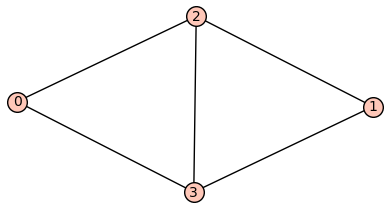

8*(x - 1)^2*x^3 - 4*(x - 1)*x^4 + x^5


In [8]:
k = "4"
OptimalityChecker("graph_data/bicyclic" + k + "c.g6", "graph_data/CRelBicyclic"+ k + ".txt")

In [9]:
k = "5"
OptimalityChecker("graph_data/bicyclic" + k + "c.g6", "graph_data/CRelBicyclic"+ k + ".txt")

More investigation required:
12*(x - 1)^2*x^4
Root index 2
9*(x - 1)^2*x^4 - 6*(x - 1)*x^5 + x^6
Max Index 3


In [10]:
k = "6"
OptimalityChecker("graph_data/bicyclic" + k + "c.g6", "graph_data/CRelBicyclic"+ k + ".txt")

More investigation required:
8*(x - 1)^2*x^5 - 4*(x - 1)*x^6 + x^7
Root index 1
14*(x - 1)^2*x^5 - 4*(x - 1)*x^6
Max Index 15


In [11]:
k = "7"
OptimalityChecker("graph_data/bicyclic" + k + "c.g6", "graph_data/CRelBicyclic"+ k + ".txt")

More investigation required:
8*(x - 1)^2*x^6 - 4*(x - 1)*x^7 + x^8
Root index 1
17*(x - 1)^2*x^6 - 5*(x - 1)*x^7
Max Index 55


In [12]:
k = "5"
OptimalityChecker("graph_data/tricyclic" + k + "c.g6", "graph_data/CRelTricyclic"+ k + ".txt")

More investigation required:
-20*(x - 1)^3*x^4 + 12*(x - 1)^2*x^5 - 6*(x - 1)*x^6 + x^7
Root index 1
-21*(x - 1)^3*x^4 + 14*(x - 1)^2*x^5 - 5*(x - 1)*x^6 + x^7
Max Index 2


In [13]:
k = "6"
OptimalityChecker("graph_data/tricyclic" + k + "c.g6", "graph_data/CRelTricyclic"+ k + ".txt")

More investigation required:
-32*(x - 1)^3*x^5
Root index 2
-24*(x - 1)^3*x^5 + 20*(x - 1)^2*x^6 - 7*(x - 1)*x^7 + x^8
Max Index 4


In [14]:
k = "7"
OptimalityChecker("graph_data/tricyclic" + k + "c.g6", "graph_data/CRelTricyclic"+ k + ".txt")

More investigation required:
-32*(x - 1)^3*x^6
Root index 2
-27*(x - 1)^3*x^6 + 27*(x - 1)^2*x^7 - 9*(x - 1)*x^8 + x^9
Max Index 50


In [15]:
k = "5"
OptimalityChecker("graph_data/quadcyclic" + k + "c.g6", "graph_data/CRelQuadcyclic"+ k + ".txt")

More investigation required:
45*(x - 1)^4*x^4 - 32*(x - 1)^3*x^5 + 14*(x - 1)^2*x^6 - 4*(x - 1)*x^7 + x^8
Root index 2
40*(x - 1)^4*x^4 - 34*(x - 1)^3*x^5 + 20*(x - 1)^2*x^6 - 7*(x - 1)*x^7 + x^8
Max Index 1


In [16]:
k = "6"
OptimalityChecker("graph_data/quadcyclic" + k + "c.g6", "graph_data/CRelQuadcyclic"+ k + ".txt")

More investigation required:
52*(x - 1)^4*x^5 - 40*(x - 1)^3*x^6 + 21*(x - 1)^2*x^7 - 7*(x - 1)*x^8 + x^9
Root index 2
48*(x - 1)^4*x^5 - 52*(x - 1)^3*x^6 + 30*(x - 1)^2*x^7 - 9*(x - 1)*x^8 + x^9
Max Index 14


In [17]:
k = "7"
OptimalityChecker("graph_data/quadcyclic" + k + "c.g6", "graph_data/CRelQuadcyclic"+ k + ".txt")

More investigation required:
48*(x - 1)^4*x^6 - 32*(x - 1)^3*x^7 + 24*(x - 1)^2*x^8 - 8*(x - 1)*x^9 + x^10
Root index 1
88*(x - 1)^4*x^6 - 62*(x - 1)^3*x^7 + 18*(x - 1)^2*x^8 - 2*(x - 1)*x^9
Max Index 94
